<a href="https://colab.research.google.com/github/SamueleDaverio/2024_Intro_Python/blob/main/S3_2_Decision_Trees.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercise 2: Training and Fine-Tuning a Decision Tree for the Moons Dataset

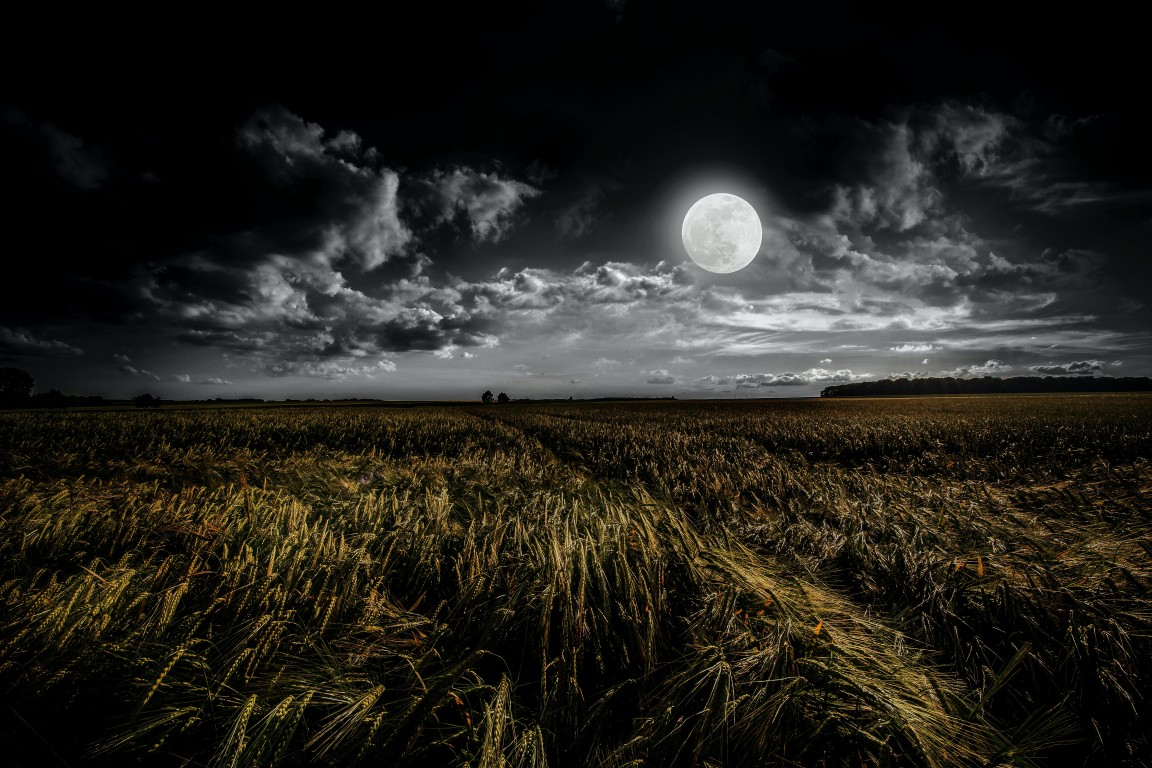

Can we grow a tree to predict the moon? 🌳 🌛

The goal of this exercise is to train and adjust the hyperparameters of a decision tree on a synthetic "moons" dataset. The dataset contains two interleaving half circles that we seek to separate via classification.

First, let's generate a moons dataset using [`make_moons`](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_moons.html).

In [1]:
from sklearn.datasets import make_moons # Import function to make moons

In [2]:
# Make 10,000 samples with Gaussian noise that has a standard deviation of 0.4
X, y = make_moons(n_samples=10000, noise=0.4)

**Q1) Split the moons dataset into a training and a test set**

Hint 1: You may use the [`train_test_split`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) function of `scikit-learn`.

Hint 2: Here we will keep 20% of the dataset for testing.

Hint 3: To ensure you get the same result every time you run the code, we will specify the `random_state` option in `train_test_split` function to be 42.

In [3]:
# Import the train_test_split function here.
from sklearn.model_selection import train_test_split

# Split the dataset into a training set and a test set
# There will be four outputs in this function. 2 for X (train and test) and 2 for y (train and test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=2000, random_state=42)

**Q2) Visualize the data, indicating which points belong to each half circle of the moon, and which points belong to the training and test sets**

Hint 1: In the moons dataset, `X` contains the 2D spatial coordinates of each sample, while `y` indicates which half circle of the moon the sample belongs to.

Hint 2: You may randomly subsample your data for visualization purposes. Alternatively, you can adjust the size and transparency of a [Matplotlib scatter plot](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html) by varying the parameters `s` and `alpha`. We adopt the latter visualization method in the code snippet. Do not hesitate to experiment with the first visualization method as long as the figure looks good.

<a name="Q2"></a>

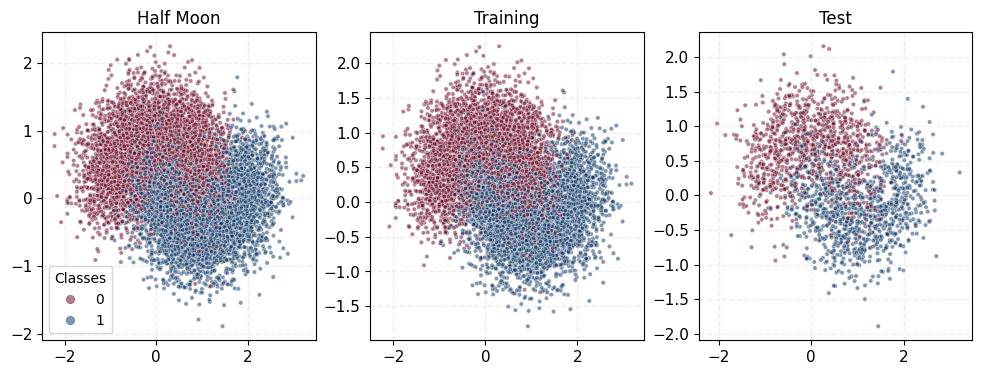

In [4]:
# Scatter the moon data and don't forget to add a legend to your figure
import numpy as np
import matplotlib.pyplot as plt
fig,ax = plt.subplots(1,3,figsize=(12,4))
#########################################################################################################
# (1) Plot the whole dataset with plt.scatter
#########################################################################################################
# The X and y indices of each data point can be obtained like this: X[:,0], X[:,1]
# The scatter points should be coloured by y
scatter = ax[0].scatter(X[:,0],X[:,1],s=10,c=y,edgecolor='w',linewidths=0.5,alpha=0.5,cmap='RdBu')
# Add legend to the upper right corner of the figure
legend1 = ax[0].legend(*scatter.legend_elements(),loc='best', title="Classes")
ax[0].set_title('Half Moon')
ax[0].tick_params(axis='both', which='major', labelsize=11)
ax[0].grid(alpha=0.2,ls='--',lw=1)

#########################################################################################################
# (2) Plot the training dataset with plt.scatter
#########################################################################################################
scatter_train = ax[1].scatter(X_train[:,0],X_train[:,1],s=10,c=y_train,edgecolor='w',linewidths=0.5,alpha=0.5,cmap='RdBu')
ax[1].set_title('Training')
ax[1].tick_params(axis='both', which='major', labelsize=11)
ax[1].grid(alpha=0.2,ls='--',lw=1)

#########################################################################################################
# (2) Plot the test dataset with plt.scatter
#########################################################################################################
scatter_test = ax[2].scatter(X_test[:,0],X_test[:,1],s=10,c=y_test,edgecolor='w',linewidths=0.5,alpha=0.5,cmap='RdBu')
ax[2].set_title('Test')
ax[2].tick_params(axis='both', which='major', labelsize=11)
ax[2].grid(alpha=0.2,ls='--',lw=1)

plt.show()

Do your data & training/test splits look reasonable?

**Q3) Conduct a hyperparameter search to find the two hyperparameters that lead to the best-performing decision tree**

Hint 1: You can conduct an exhaustive hyperparameter search over specified parameter values using the `GridSearchCV` class documented [at this link](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html). We recommend using cross-validation by setting the parameter `cv`.

Hint 2: If you choose to train a [`DecisionTreeClassifier`](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) object, we recommmend conducting the search over the `max_leaf_nodes` and `min_samples_split` hyperparameters. Consult the [`DecisionTreeClassifier` documentation](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) to decide which range to search over.

<a name="Q3"></a>

In [5]:
# Import the necessary classes and functions
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

In [6]:
# Conduct the grid search to find good hyperparameter values
# for your decision tree
# For 'max_leaf_nodes', search between 2 and 120
# For 'min_samples_split', search between 2 and 10

##############################################################################################################################
# 1. Define hyperparameter search grid
##############################################################################################################################
# In param_grid, define the hyperparameters you would like to test, and the ranges the hyperparameters should be in --> nuova variabile che stocca iperparametri da cui puoi prendere i migliori
param_grid = {'max_leaf_nodes':range(2,121), 'min_samples_split':range(2,11)}

##############################################################################################################################
# 2. GridSearch --> serve per trovare migliori iperparametri
##############################################################################################################################
# Perform GridSearch on your DecisionTree (random_state=42 to ensure same result every time)
# use cv=3, verbose=1 for GridSearchCV()
gsc_tree = GridSearchCV(DecisionTreeClassifier(random_state=42),param_grid,cv=3,verbose=1) # definisci modello in cui cercare, riproducibilità, griglia di iperparametri, crossvalidation (3 subset)

##############################################################################################################################
# 3. Fit on training set --> alleni modelli definiti sopra, trova quello con migliore performance
##############################################################################################################################
gsc_tree.fit(X_train,y_train)

Fitting 3 folds for each of 1071 candidates, totalling 3213 fits


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_leaf_nodes': range(2, 121),
                         'min_samples_split': range(2, 11)},
             verbose=1)

In [7]:
# Print the best values you found for the hyperparameters
# using the `best_estimator_` attribute of your grid search object
print(gsc_tree.best_estimator_)

DecisionTreeClassifier(max_leaf_nodes=15, random_state=42)


**Q4) Using the best hyperparameter values you found, train a decision tree over the entire training set and calculate its accuracy over both the training and test sets**

Hint 1: [`GridSearchCV`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) has a method `predict` that automatically selects the best model found during the search.

Hint 2: Using the [accuracy classification score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html), you should find an accuracy of $\approx$85% on the test set.

In [8]:
# Make predictions on the training and test sets with your best model
y_pred_train = gsc_tree.predict(X_train) # per vedere quanto bene il modello ha imparato
y_pred_test = gsc_tree.predict(X_test)   # performance sui dati nuovi

In [9]:
# Calculate the accuracy of the best model over the training and test sets
from sklearn.metrics import accuracy_score
print(f'Accuracy over training set: {(accuracy_score(y_train, y_pred_train)):.2%} \n'
f'Accuracy over test set: {(accuracy_score(y_test, y_pred_test)):.2%}')

Accuracy over training set: 85.60% 
Accuracy over test set: 85.75%


**Q5) Visualize the errors made by your best model**

Hint: You may recycle the visualization scripts you developed in [Question 2](#Q2)

In [10]:
# Scatter points for which your best model made erroneous predictions
# and compare them to points for which your best models made correct predictions
y_pred = gsc_tree.predict(X_test)
corr_X,wrong_X = [],[]
for indx,obj in enumerate(y_pred): # Pull out predictions on each data points one-by-one
  if obj != y_test[indx]: # If the predictions is not equal to output truth (y_test)
    wrong_X.append(X_test[indx]) # Model made an error
  else:
    corr_X.append(X_test[indx]) # Model correct prediction

wrong_X = np.array(wrong_X)
corr_X = np.array(corr_X)

Codice analizza le predizioni del modello sul test set e separa i punti corretti da quelli sbagliati.
- Prende le predizioni del modello (y_pred) sui dati di test (X_test).
- Confronta ogni predizione con il valore reale (y_test).
- Crea due gruppi di dati: corr_X → punti predetti correttamente e wrong_X → punti predetti in modo errato
- Converte questi gruppi in array NumPy, pronti per analisi o visualizzazioni  (ad esempio per fare uno scatter plot che mostri dove il modello sbaglia).

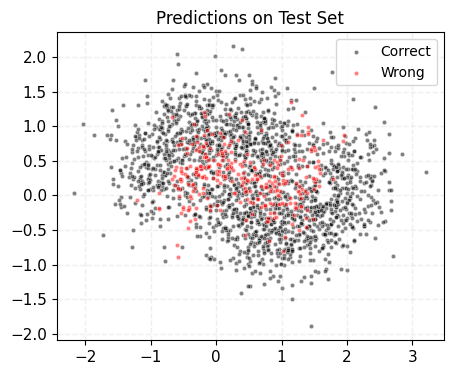

In [11]:
# Recycle the visualization scripts earlier
fig,ax = plt.subplots(1,1,figsize=(5,4))
##############################################################################################################################
# 1. Plot correct prediction here
##############################################################################################################################
scatter_corr = ax.scatter(corr_X[:,0],corr_X[:,1],s=10,color='k',edgecolor='w',linewidths=0.5,alpha=0.5, label='Correct')
##############################################################################################################################
# 2. Plot wrong prediction here
##############################################################################################################################
scatter_wrong = ax.scatter(wrong_X[:,0],wrong_X[:,1],s=10,color='r',edgecolor='w',linewidths=0.5,alpha=0.5, label='Wrong')
##############################################################################################################################
# 3. Title etc.
##############################################################################################################
ax.set_title('Predictions on Test Set')
ax.tick_params(axis='both', which='major', labelsize=11)
ax.grid(alpha=0.2,ls='--',lw=1)
ax.legend()
plt.show()

Can you think of ways to improve your best model?

# Bonus Exercise 2: Upgrading the Decision Tree to a Random Forest

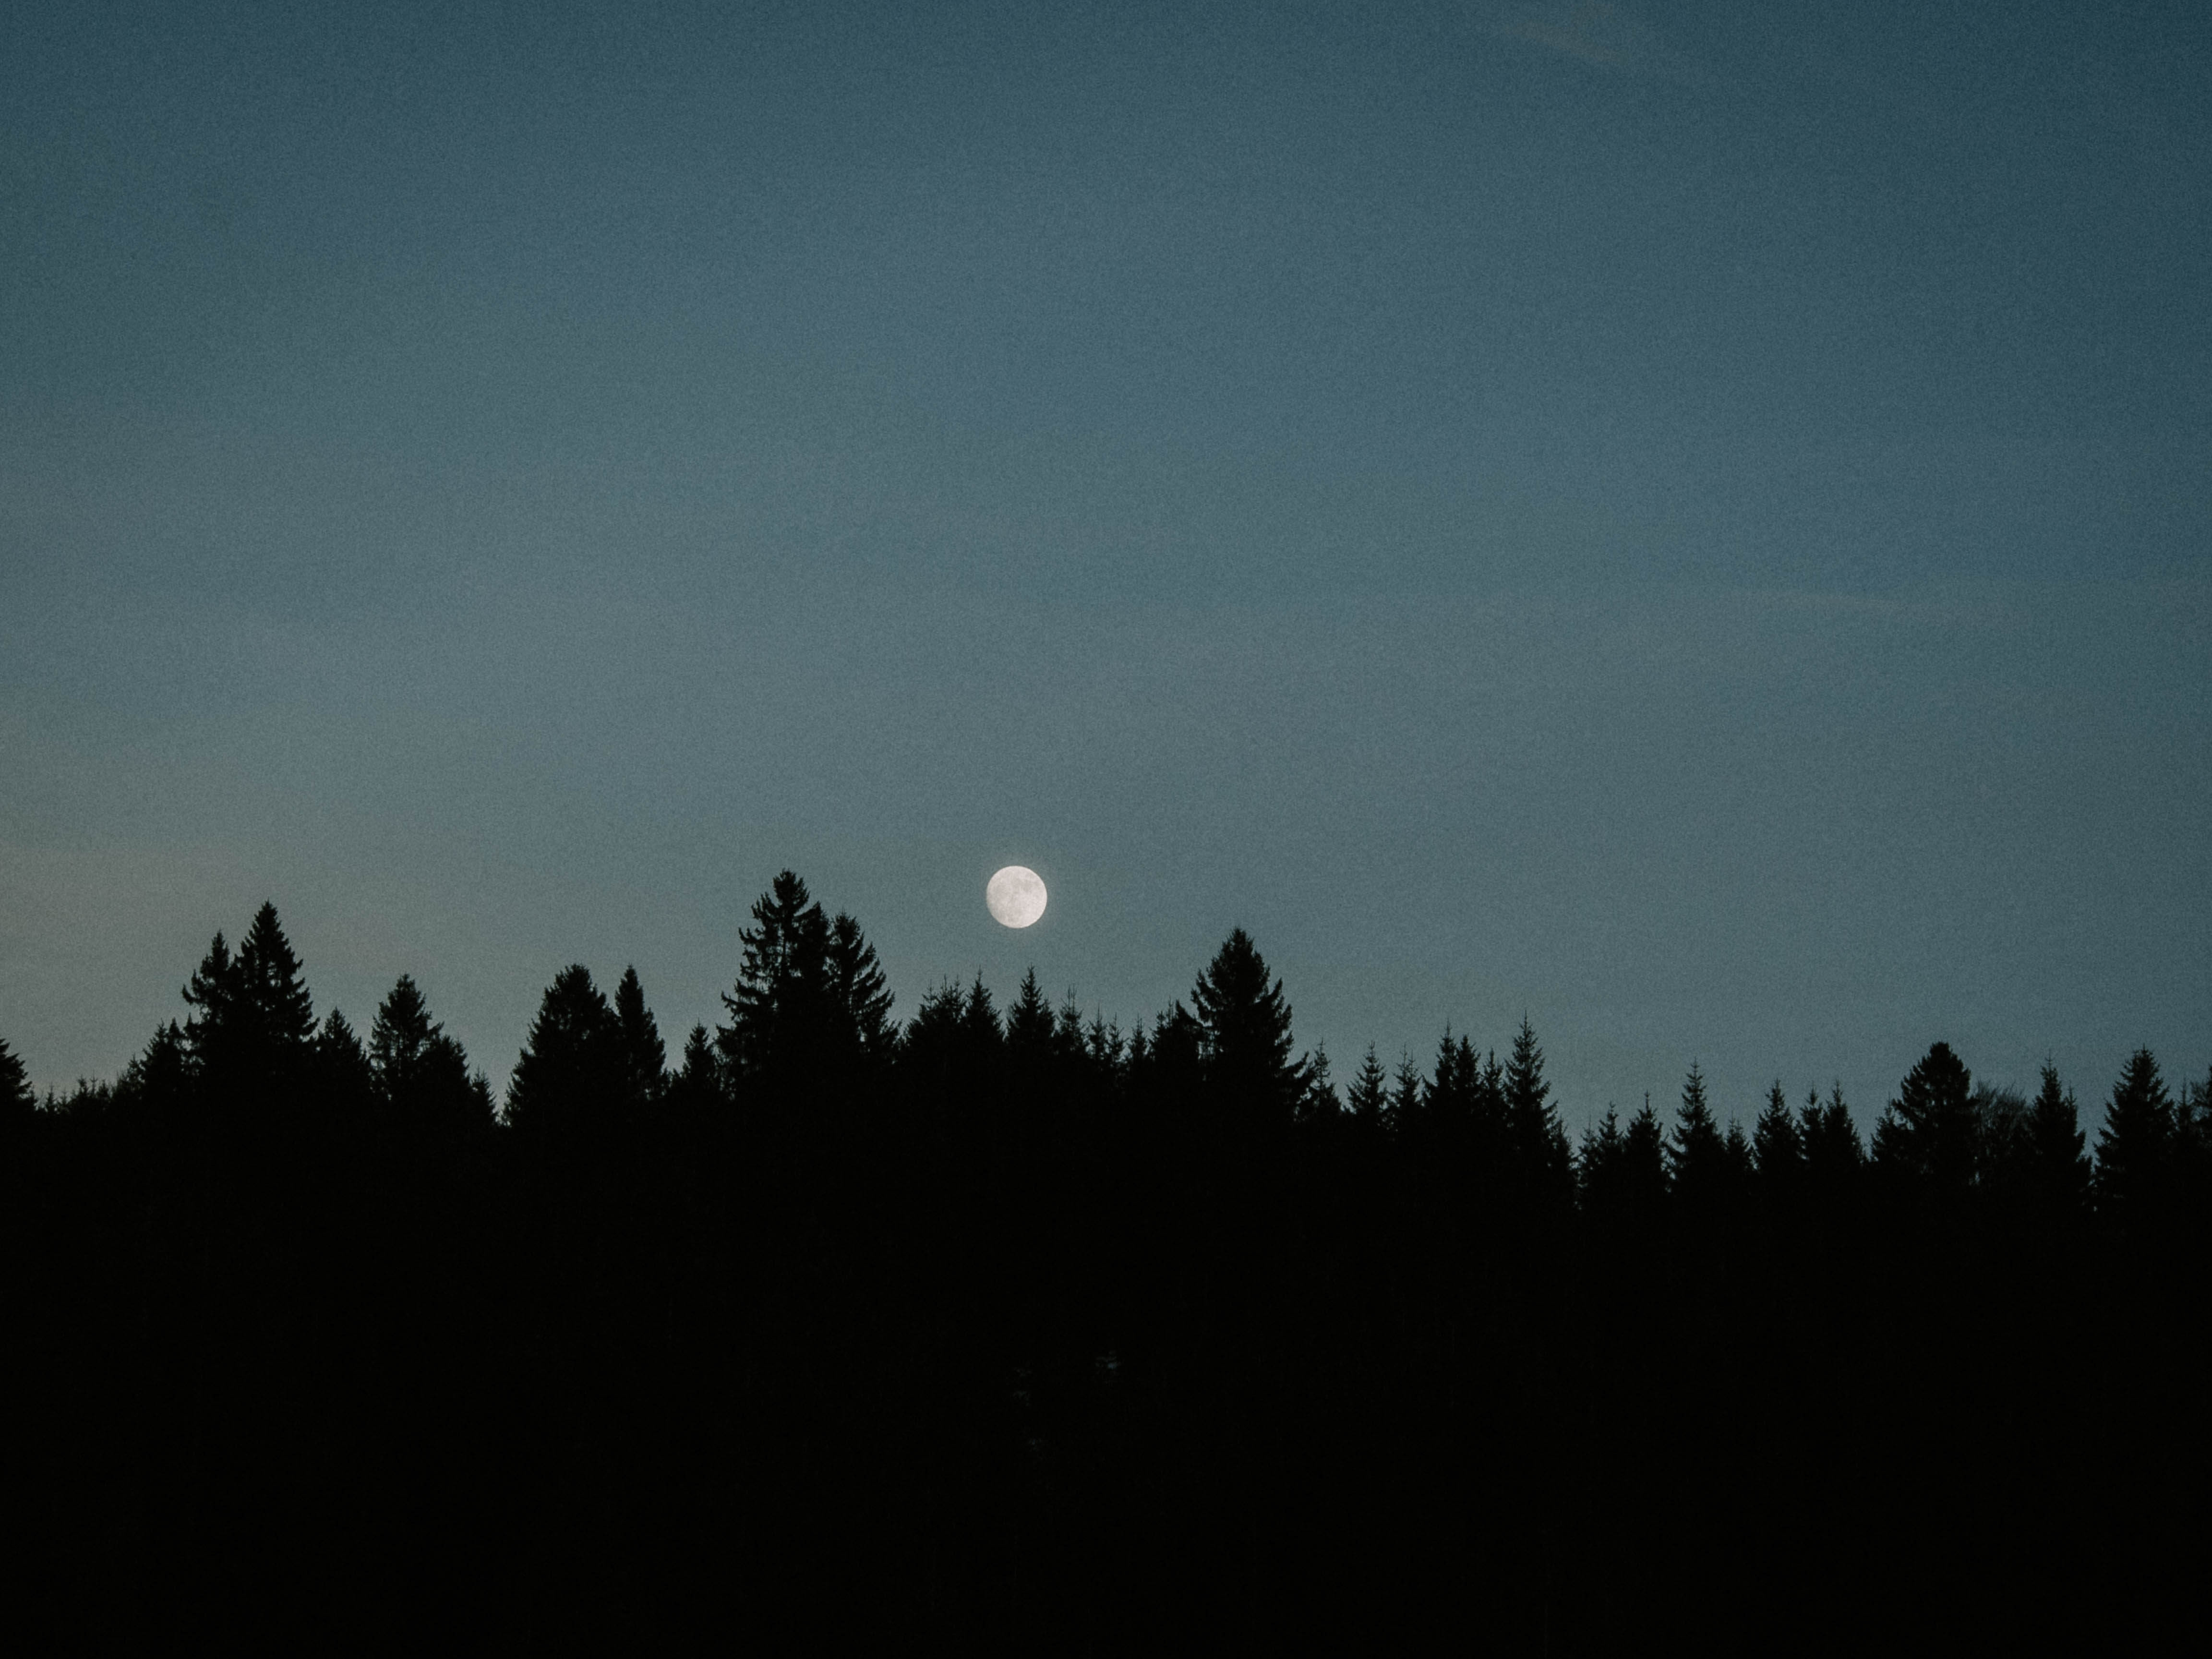

Is a full forest enough to predict the moon? 🌲

Building on the previous exercise, we would like to upgrade the decision tree to a random forest to make more accurate predictions on the `moons` dataset.

**Q1) Generate 1,000 subsets of the training set, each containing 100 instances selected randomly**

Hint: You may use `scikit-learn`'s random permutation cross-validator [ShuffleSplit](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.ShuffleSplit.html) with the appropriate value of the  `n_splits` parameter.

In [ ]:
# Import and build the random permutation cross-validator

In [ ]:
# Generate 1,000 subsets of the training sets with
# 100 randomly-selected instances

**Q2) Train one [`DecisionTreeClassifier`](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) on each subset, using the best hyperparameter values found [above](#Q3)**

In [ ]:
# Train one decision tree per subset (clone also works! but here I'd like to do this the hard way =])

**Q3) Evaluate each decision tree on the test set and visualize their accuracy**

Hint 1: You can quickly make histograms by using `Matplotlib.pyplot`'s [`hist`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html) function

Hint 2: The mean accuracy of your decision trees should be approximately 80% because the decision trees are fitted on smaller sets.

In [ ]:
# Calculate the mean accuracy

In [ ]:
# Visualize the distribution of accuracies

Now comes the magic ❇ 🌲 ❇

**Q4) Generate the predictions of the 1,000 decision trees over the test set, and only keep the most frequent prediction. This gives you *majority-vote predictions* over the test set**

Hint: You may use `Scipy`'s [`mode`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.mode.html) function to calculate the most frequent prediction.

In [ ]:
# Generate the predictions of all trained decision trees over the test set


In [ ]:
# For each instance of the test set, calculate the majority-vote prediction


Congratulations!! 😃 You have created a random forest classifier 🌲 🌳 🌲

**Q5) Calculate the accuracy of your random forest classifier and visualize its performance**

Hint: Your accuracy should be approximately 1% higher than your best decision tree.

In [ ]:
# Calculate the accuracy of your random forest classifier

accuracy: 75.90%


In [ ]:
# Visualize its errors: Which points did the
# random forest classify correctly
# when the decision tree was making an error?

# Task
Complete the code to implement a random forest classifier from scratch using 1,000 decision trees trained on random subsets of the training data, evaluate its performance, and visualize the results.

## Generate subsets

### Subtask:
Generate 1,000 subsets of the training data, each containing 100 instances selected randomly.


**Reasoning**:
Import the `ShuffleSplit` class and generate the indices for 1000 random subsets of the training data, each containing 100 instances.



In [ ]:
from sklearn.model_selection import ShuffleSplit

# Instantiate a ShuffleSplit object to generate 1000 random subsets of size 100
rs = ShuffleSplit(n_splits=1000, test_size=100, random_state=42)

# Generate the indices for each subset
train_subset_indices = []
for train_index, test_index in rs.split(X_train, y_train):
    train_subset_indices.append(test_index)

## Train decision trees

### Subtask:
Train a Decision Tree Classifier on each of the generated subsets using the best hyperparameters found in the previous exercise.


**Reasoning**:
Train a Decision Tree Classifier on each of the generated subsets using the best hyperparameters found in the previous exercise.



In [ ]:
# Create an empty list to store the trained decision tree models
forest = []

# Get the best hyperparameters from the grid search result
best_params = gsc_tree.best_estimator_.get_params()
max_leaf_nodes = best_params['max_leaf_nodes']
min_samples_split = best_params['min_samples_split']

# Iterate through the train_subset_indices list
for indices in train_subset_indices:
    # Select the corresponding subset of X_train and y_train
    X_subset = X_train[indices]
    y_subset = y_train[indices]

    # Create a new DecisionTreeClassifier instance with the best hyperparameters
    tree = DecisionTreeClassifier(max_leaf_nodes=max_leaf_nodes,
                                  min_samples_split=min_samples_split,
                                  random_state=42)

    # Train the decision tree model on the selected subset
    tree.fit(X_subset, y_subset)

    # Append the trained model to the list
    forest.append(tree)

## Evaluate individual trees

### Subtask:
Evaluate the accuracy of each trained decision tree on the test set and visualize the distribution of accuracies.


**Reasoning**:
Evaluate the accuracy of each trained decision tree on the test set and visualize the distribution of accuracies by iterating through the trained trees, calculating their accuracy on the test set, storing the accuracies in a list, calculating and printing the mean accuracy, and then plotting a histogram of the accuracies.



Mean accuracy: 78.81%


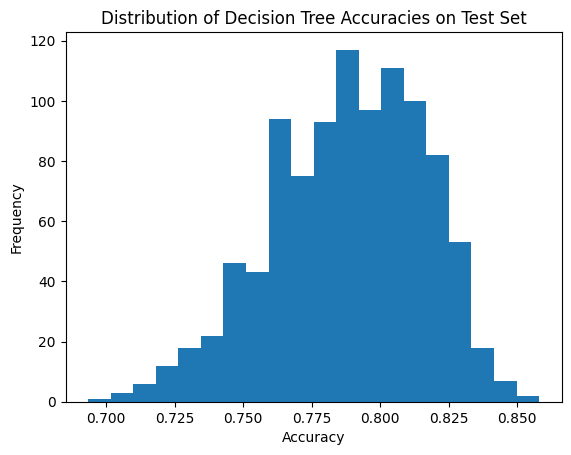

In [ ]:
# Create an empty list to store the accuracy of each decision tree
accuracies = []

# Iterate through the forest list and calculate the accuracy of each tree on the test set
for tree in forest:
    y_pred = tree.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

# Calculate the mean accuracy
mean_accuracy = np.mean(accuracies)

# Print the mean accuracy
print(f'Mean accuracy: {mean_accuracy:.2%}')

# Visualize the distribution of accuracies
plt.hist(accuracies, bins=20)
plt.title('Distribution of Decision Tree Accuracies on Test Set')
plt.xlabel('Accuracy')
plt.ylabel('Frequency')
plt.show()

## Generate majority-vote predictions

### Subtask:
Generate the predictions of the 1,000 decision trees over the test set, and only keep the most frequent prediction. This gives you *majority-vote predictions* over the test set


**Reasoning**:
Generate predictions from each tree on the test set, combine them, and find the majority vote for each instance.



In [ ]:
from scipy.stats import mode

# Create an empty list to store the predictions of each tree on the test set
predictions = []

# Iterate through the forest and get predictions for each tree
for tree in forest:
    y_pred_tree = tree.predict(X_test)
    predictions.append(y_pred_tree)

# Convert the predictions list to a NumPy array
predictions = np.array(predictions)

# Find the majority vote for each instance in the test set
y_pred_rf, _ = mode(predictions, axis=0)

## Calculate random forest accuracy

### Subtask:
Calculate the accuracy of your random forest classifier (based on the majority-vote predictions) on the test set.


**Reasoning**:
Calculate the accuracy of the random forest classifier's predictions on the test set.



In [ ]:
# Calculate the accuracy of the random forest classifier
rf_accuracy = accuracy_score(y_test, y_pred_rf)

# Print the random forest classifier accuracy
print(f'Accuracy: {rf_accuracy:.2%}')

Accuracy: 87.15%


## Visualize random forest errors

### Subtask:
Visualize the errors made by the random forest classifier on the test set.


**Reasoning**:
Visualize the errors made by the random forest classifier on the test set by plotting correct and incorrect predictions.



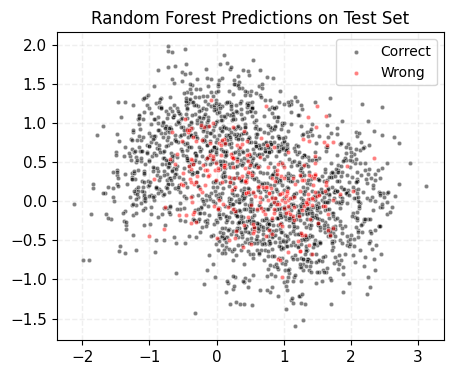

In [ ]:
# Identify correct and incorrect predictions
rf_corr_X = X_test[y_pred_rf == y_test]
rf_wrong_X = X_test[y_pred_rf != y_test]

# Create the scatter plot
fig, ax = plt.subplots(1, 1, figsize=(5, 4))

# Plot correct predictions
ax.scatter(rf_corr_X[:, 0], rf_corr_X[:, 1], s=10, color='k', edgecolor='w', linewidths=0.5, alpha=0.5, label='Correct')

# Plot wrong predictions
ax.scatter(rf_wrong_X[:, 0], rf_wrong_X[:, 1], s=10, color='r', edgecolor='w', linewidths=0.5, alpha=0.5, label='Wrong')

# Add title, labels, grid, and legend
ax.set_title('Random Forest Predictions on Test Set')
ax.tick_params(axis='both', which='major', labelsize=11)
ax.grid(alpha=0.2, ls='--', lw=1)
ax.legend()

# Display the plot
plt.show()

## Summary:

### Data Analysis Key Findings

*   1,000 subsets of the training data were generated, each containing 100 instances.
*   1,000 Decision Tree Classifiers were trained, one on each subset, using the best hyperparameters found in a previous grid search.
*   The mean accuracy of the individual decision trees on the test set was 78.81%.
*   The accuracy of the random forest classifier, based on majority-vote predictions, on the test set was 87.15%.

### Insights or Next Steps

*   The random forest classifier significantly outperforms the average individual decision tree, demonstrating the power of ensemble methods.
*   Visualize the decision boundary of the random forest to better understand how it separates the classes and where the errors occur.
